##### What I want to achieve in this notebook?

Tests about dropout, regularization L1 and L2, dropout and regularization at the same time, and for different "strengths". 

In [ ]:
import sys

sys.path.append("../src")

import torch
from torch import nn

import torchvision
import torchvision.transforms as transforms


from baseline_model import BaselineModel
from enhanced_model import EnhancedModel
from helper_functions import run_model
from plots_functions import (
    multiple_runs_with_uncertainty_band,
    multiple_runs_with_every_run,
)


device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
seed = 213
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

In [ ]:
epochs = 15
lr = 0.01
num_of_repeats = 4
metrics_list = []
total_time_list = []

cinic_directory = "../data"
cinic_train = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        cinic_directory + "/train", transform=transforms.ToTensor()
    ),
    batch_size=64,
    shuffle=True,
    num_workers=6,
    pin_memory=True,
    persistent_workers=True,
)

cinic_test = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        cinic_directory + "/test", transform=transforms.ToTensor()
    ),
    batch_size=64,
    shuffle=True,
    num_workers=6,
    pin_memory=True,
    persistent_workers=True,
)


for i in range(num_of_repeats):
    model = BaselineModel(input_shape=3, hidden_units=15, output_shape=10).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(params=model.parameters(), lr=lr)

    metrics, total_time = run_model(
        cinic_train, cinic_test, model, loss_fn, optimizer, device=device, epochs=epochs
    )

    metrics_list.append(metrics)
    total_time_list.append(total_time)

  0%|          | 0/15 [00:00<?, ?it/s]


Train time on cuda: 64.211 seconds


  0%|          | 0/15 [00:00<?, ?it/s]


Train time on cuda: 62.539 seconds


  0%|          | 0/15 [00:00<?, ?it/s]


Train time on cuda: 62.593 seconds


  0%|          | 0/15 [00:00<?, ?it/s]


Train time on cuda: 62.205 seconds


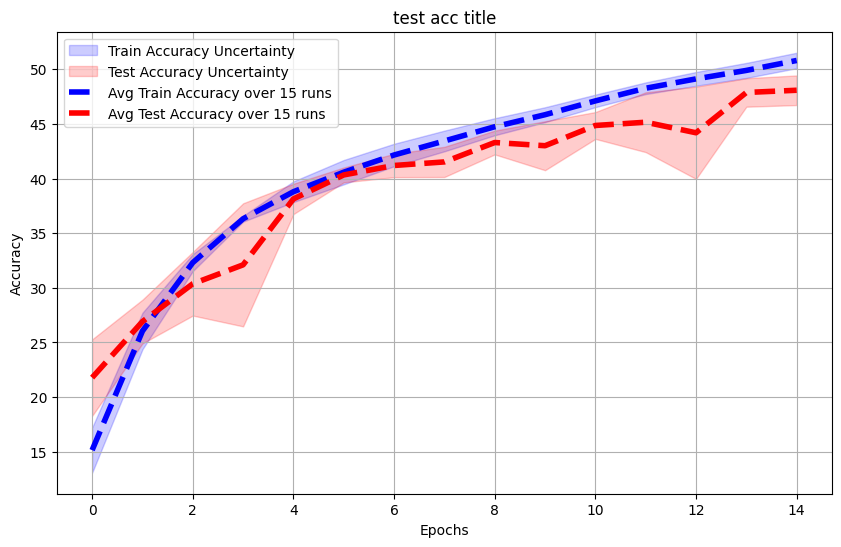

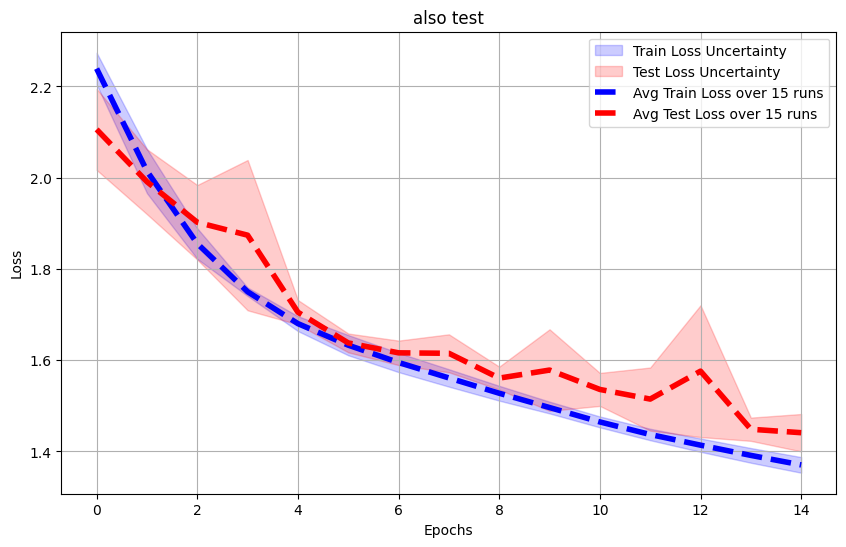

In [ ]:
multiple_runs_with_uncertainty_band(
    metrics_list=metrics_list, title_accuracy="test acc title", title_loss="also test"
)

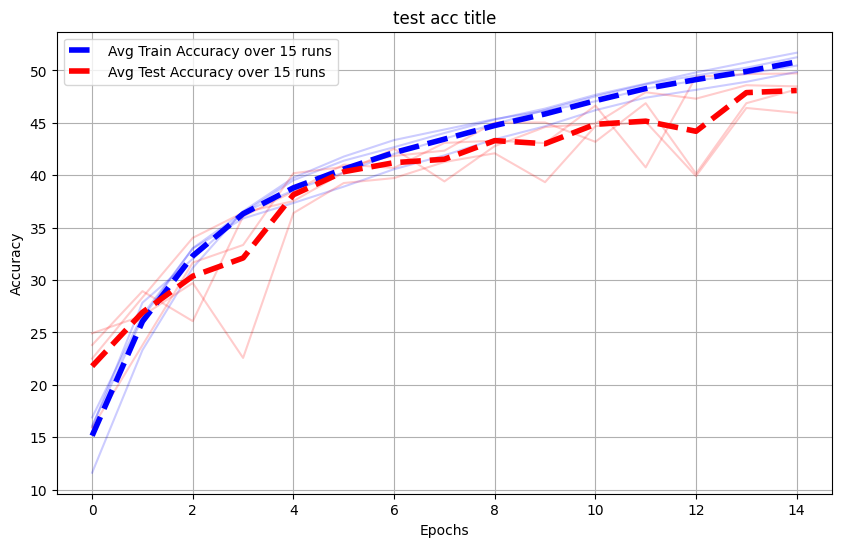

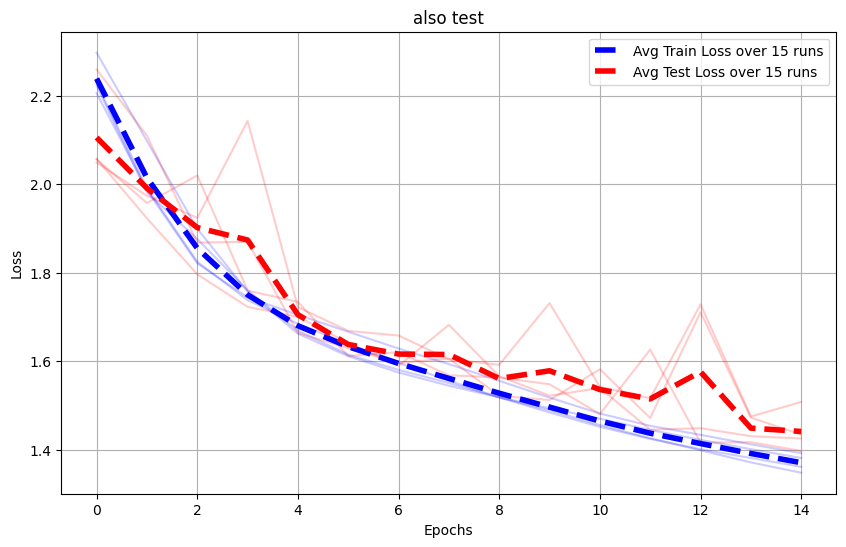

In [ ]:
multiple_runs_with_every_run(
    metrics_list=metrics_list, title_accuracy="test acc title", title_loss="also test"
)